In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import xgboost as xgb
import joblib
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df = pd.read_csv('final4.csv')

In [8]:
df.head()

,CO2g_mole%,N2g_mole%,H2Sg_mole%,C1g_mole%,C2g_mole%,C3g_mole%,C4g_mole%,C5g_mole%,C6g_mole%,Tr_C,MWc7+_g/mol,MMP_mPa,N2o_mole%,CO2o_mole%,C1o_mole%,C2o_mole%,C3o_mole%,C4o_mole%,C5o_mole%,C6o_mole%
0,100,0,0,0,0,0,0,0,0,82.2,281,21.99,0.39,1.41,6.35,7.43,7.13,4.62,4.24,2.67
1,3.525,0.3,0,54.375,19.65,18.65,3.35,0.15,0,82.2,281,27.23,0.39,1.41,6.35,7.43,7.13,4.62,4.24,2.67
2,3.525,0.3,25,54.375,13.65,2.4,0.6,0.15,0,82.2,281,26.92,0.39,1.41,6.35,7.43,7.13,4.62,4.24,2.67
3,4.23,0.36,0,65.25,18.78,9.38,1.82,0.18,0,82.2,281,30.44,0.39,1.41,6.35,7.43,7.13,4.62,4.24,2.67
4,4.23,0.36,10,65.25,16.38,2.88,0.72,0.18,0,82.2,281,30.44,0.39,1.41,6.35,7.43,7.13,4.62,4.24,2.67


In [10]:
df.shape

(968, 20)

In [12]:
df_cleaned = df.replace('N.A.', pd.NA).dropna()

print("\nDataFrame after removing rows with 'N.A.':")
print(df_cleaned)


DataFrame after removing rows with 'N.A.':
    CO2g_mole% N2g_mole% H2Sg_mole% C1g_mole% C2g_mole% C3g_mole% C4g_mole%  \
0          100         0          0         0         0         0         0   
1        3.525       0.3          0    54.375     19.65     18.65      3.35   
2        3.525       0.3         25    54.375     13.65       2.4       0.6   
3         4.23      0.36          0     65.25     18.78      9.38      1.82   
4         4.23      0.36         10     65.25     16.38      2.88      0.72   
..         ...       ...        ...       ...       ...       ...       ...   
944        100         0          0         0         0         0         0   
945        100         0          0         0         0         0         0   
946        100         0          0         0         0         0         0   
947        100         0          0         0         0         0         0   
948        100         0          0         0         0         0         0   

    C5g

In [14]:
df_cleaned.shape

(672, 20)

In [16]:
df_cleaned_no_duplicates = df_cleaned.drop_duplicates()

print("\nDataFrame after removing duplicate rows:")
print(df_cleaned_no_duplicates)


DataFrame after removing duplicate rows:
    CO2g_mole% N2g_mole% H2Sg_mole% C1g_mole% C2g_mole% C3g_mole% C4g_mole%  \
0          100         0          0         0         0         0         0   
1        3.525       0.3          0    54.375     19.65     18.65      3.35   
2        3.525       0.3         25    54.375     13.65       2.4       0.6   
3         4.23      0.36          0     65.25     18.78      9.38      1.82   
4         4.23      0.36         10     65.25     16.38      2.88      0.72   
..         ...       ...        ...       ...       ...       ...       ...   
944        100         0          0         0         0         0         0   
945        100         0          0         0         0         0         0   
946        100         0          0         0         0         0         0   
947        100         0          0         0         0         0         0   
948        100         0          0         0         0         0         0   

    C5g_m

In [18]:
df_cleaned_no_duplicates.to_csv('cleaned_dataset.csv', index=False)




In [20]:
df_cleaned_no_duplicates = pd.read_csv('cleaned_dataset.csv')

testing_data2 =df_cleaned_no_duplicates.sample(n=37, random_state=42)

training_data2 = df_cleaned_no_duplicates.drop(testing_data2.index)

training_data2.to_csv('training_final.csv', index=False)
testing_data2.to_csv('blind_final.csv', index=False)

print("Datasets saved successfully:")
print(f"Training data: {len(training_data2)} rows -> 'training_final.csv'")
print(f"Testing data: {len(testing_data2)} rows -> 'blind_final.csv'")



Datasets saved successfully:
Training data: 630 rows -> 'training_final.csv'
Testing data: 37 rows -> 'blind_final.csv'


In [22]:
df_training = pd.read_csv('training_final.csv')

In [24]:
df_training.head()

,CO2g_mole%,N2g_mole%,H2Sg_mole%,C1g_mole%,C2g_mole%,C3g_mole%,C4g_mole%,C5g_mole%,C6g_mole%,Tr_C,MWc7+_g/mol,MMP_mPa,N2o_mole%,CO2o_mole%,C1o_mole%,C2o_mole%,C3o_mole%,C4o_mole%,C5o_mole%,C6o_mole%
0,100.000,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.0,82.2,281.0,21.99,0.39,1.41,6.35,7.43,7.13,4.62,4.24,2.67
1,3.525,0.30,0.0,54.375,19.65,18.65,3.35,0.15,0.0,82.2,281.0,27.23,0.39,1.41,6.35,7.43,7.13,4.62,4.24,2.67
2,3.525,0.30,25.0,54.375,13.65,2.40,0.60,0.15,0.0,82.2,281.0,26.92,0.39,1.41,6.35,7.43,7.13,4.62,4.24,2.67
3,4.230,0.36,0.0,65.250,18.78,9.38,1.82,0.18,0.0,82.2,281.0,30.44,0.39,1.41,6.35,7.43,7.13,4.62,4.24,2.67
4,4.230,0.36,10.0,65.250,16.38,2.88,0.72,0.18,0.0,82.2,281.0,30.44,0.39,1.41,6.35,7.43,7.13,4.62,4.24,2.67


In [26]:
df_training.shape

(630, 20)

In [28]:
df_training.info

<bound method DataFrame.info of      CO2g_mole%  N2g_mole%  H2Sg_mole%  C1g_mole%  C2g_mole%  C3g_mole%  \
0       100.000       0.00         0.0      0.000       0.00       0.00   
1         3.525       0.30         0.0     54.375      19.65      18.65   
2         3.525       0.30        25.0     54.375      13.65       2.40   
3         4.230       0.36         0.0     65.250      18.78       9.38   
4         4.230       0.36        10.0     65.250      16.38       2.88   
..          ...        ...         ...        ...        ...        ...   
625     100.000       0.00         0.0      0.000       0.00       0.00   
626     100.000       0.00         0.0      0.000       0.00       0.00   
627     100.000       0.00         0.0      0.000       0.00       0.00   
628     100.000       0.00         0.0      0.000       0.00       0.00   
629     100.000       0.00         0.0      0.000       0.00       0.00   

     C4g_mole%  C5g_mole%  C6g_mole%   Tr_C  MWc7+_g/mol   MMP_mPa 

In [30]:
df_training.describe

<bound method NDFrame.describe of      CO2g_mole%  N2g_mole%  H2Sg_mole%  C1g_mole%  C2g_mole%  C3g_mole%  \
0       100.000       0.00         0.0      0.000       0.00       0.00   
1         3.525       0.30         0.0     54.375      19.65      18.65   
2         3.525       0.30        25.0     54.375      13.65       2.40   
3         4.230       0.36         0.0     65.250      18.78       9.38   
4         4.230       0.36        10.0     65.250      16.38       2.88   
..          ...        ...         ...        ...        ...        ...   
625     100.000       0.00         0.0      0.000       0.00       0.00   
626     100.000       0.00         0.0      0.000       0.00       0.00   
627     100.000       0.00         0.0      0.000       0.00       0.00   
628     100.000       0.00         0.0      0.000       0.00       0.00   
629     100.000       0.00         0.0      0.000       0.00       0.00   

     C4g_mole%  C5g_mole%  C6g_mole%   Tr_C  MWc7+_g/mol   MMP_mP

In [32]:
df_training

,CO2g_mole%,N2g_mole%,H2Sg_mole%,C1g_mole%,C2g_mole%,C3g_mole%,C4g_mole%,C5g_mole%,C6g_mole%,Tr_C,MWc7+_g/mol,MMP_mPa,N2o_mole%,CO2o_mole%,C1o_mole%,C2o_mole%,C3o_mole%,C4o_mole%,C5o_mole%,C6o_mole%
0,100.000,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.0,82.20,281.0,21.99000,0.39,1.41,6.35,7.43,7.13,4.62,4.24,2.67
1,3.525,0.30,0.0,54.375,19.65,18.65,3.35,0.15,0.0,82.20,281.0,27.23000,0.39,1.41,6.35,7.43,7.13,4.62,4.24,2.67
2,3.525,0.30,25.0,54.375,13.65,2.40,0.60,0.15,0.0,82.20,281.0,26.92000,0.39,1.41,6.35,7.43,7.13,4.62,4.24,2.67
3,4.230,0.36,0.0,65.250,18.78,9.38,1.82,0.18,0.0,82.20,281.0,30.44000,0.39,1.41,6.35,7.43,7.13,4.62,4.24,2.67
4,4.230,0.36,10.0,65.250,16.38,2.88,0.72,0.18,0.0,82.20,281.0,30.44000,0.39,1.41,6.35,7.43,7.13,4.62,4.24,2.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,100.000,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.0,71.11,205.0,14.79997,0.89,0.96,38.46,17.69,28.27,12.51,1.24,0.00
626,100.000,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.0,71.11,205.0,13.99997,1.03,1.00,45.47,16.61,24.26,10.58,1.05,0.00
627,100.000,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.0,71.11,205.0,14.79997,1.06,1.01,46.93,16.38,23.42,10.18,1.01,0.00
628,100.000,0.00,0.0,0.000,0.00,0.00,0.00,0.00,0.0,71.11,241.0,31.79993,0.27,1.14,70.33,9.49,9.38,4.95,2.30,1.98


In [34]:
missing_values = df.isnull().sum()


missing_columns = missing_values[missing_values > 0]

if not missing_columns.empty:
    print("Columns with missing values:")
    print(missing_columns)
else:
    print("No missing values found in the dataset.")

Columns with missing values:
N2g_mole%    1
dtype: int64


In [36]:
df_training.fillna(df_training.mean(), inplace=True)

In [38]:
print("\nMissing values after handling:")
print(df_training.isnull().sum())


Missing values after handling:
CO2g_mole%     0
N2g_mole%      0
H2Sg_mole%     0
C1g_mole%      0
C2g_mole%      0
C3g_mole%      0
C4g_mole%      0
C5g_mole%      0
C6g_mole%      0
Tr_C           0
MWc7+_g/mol    0
MMP_mPa        0
N2o_mole%      0
CO2o_mole%     0
C1o_mole%      0
C2o_mole%      0
C3o_mole%      0
C4o_mole%      0
C5o_mole%      0
C6o_mole%      0
dtype: int64


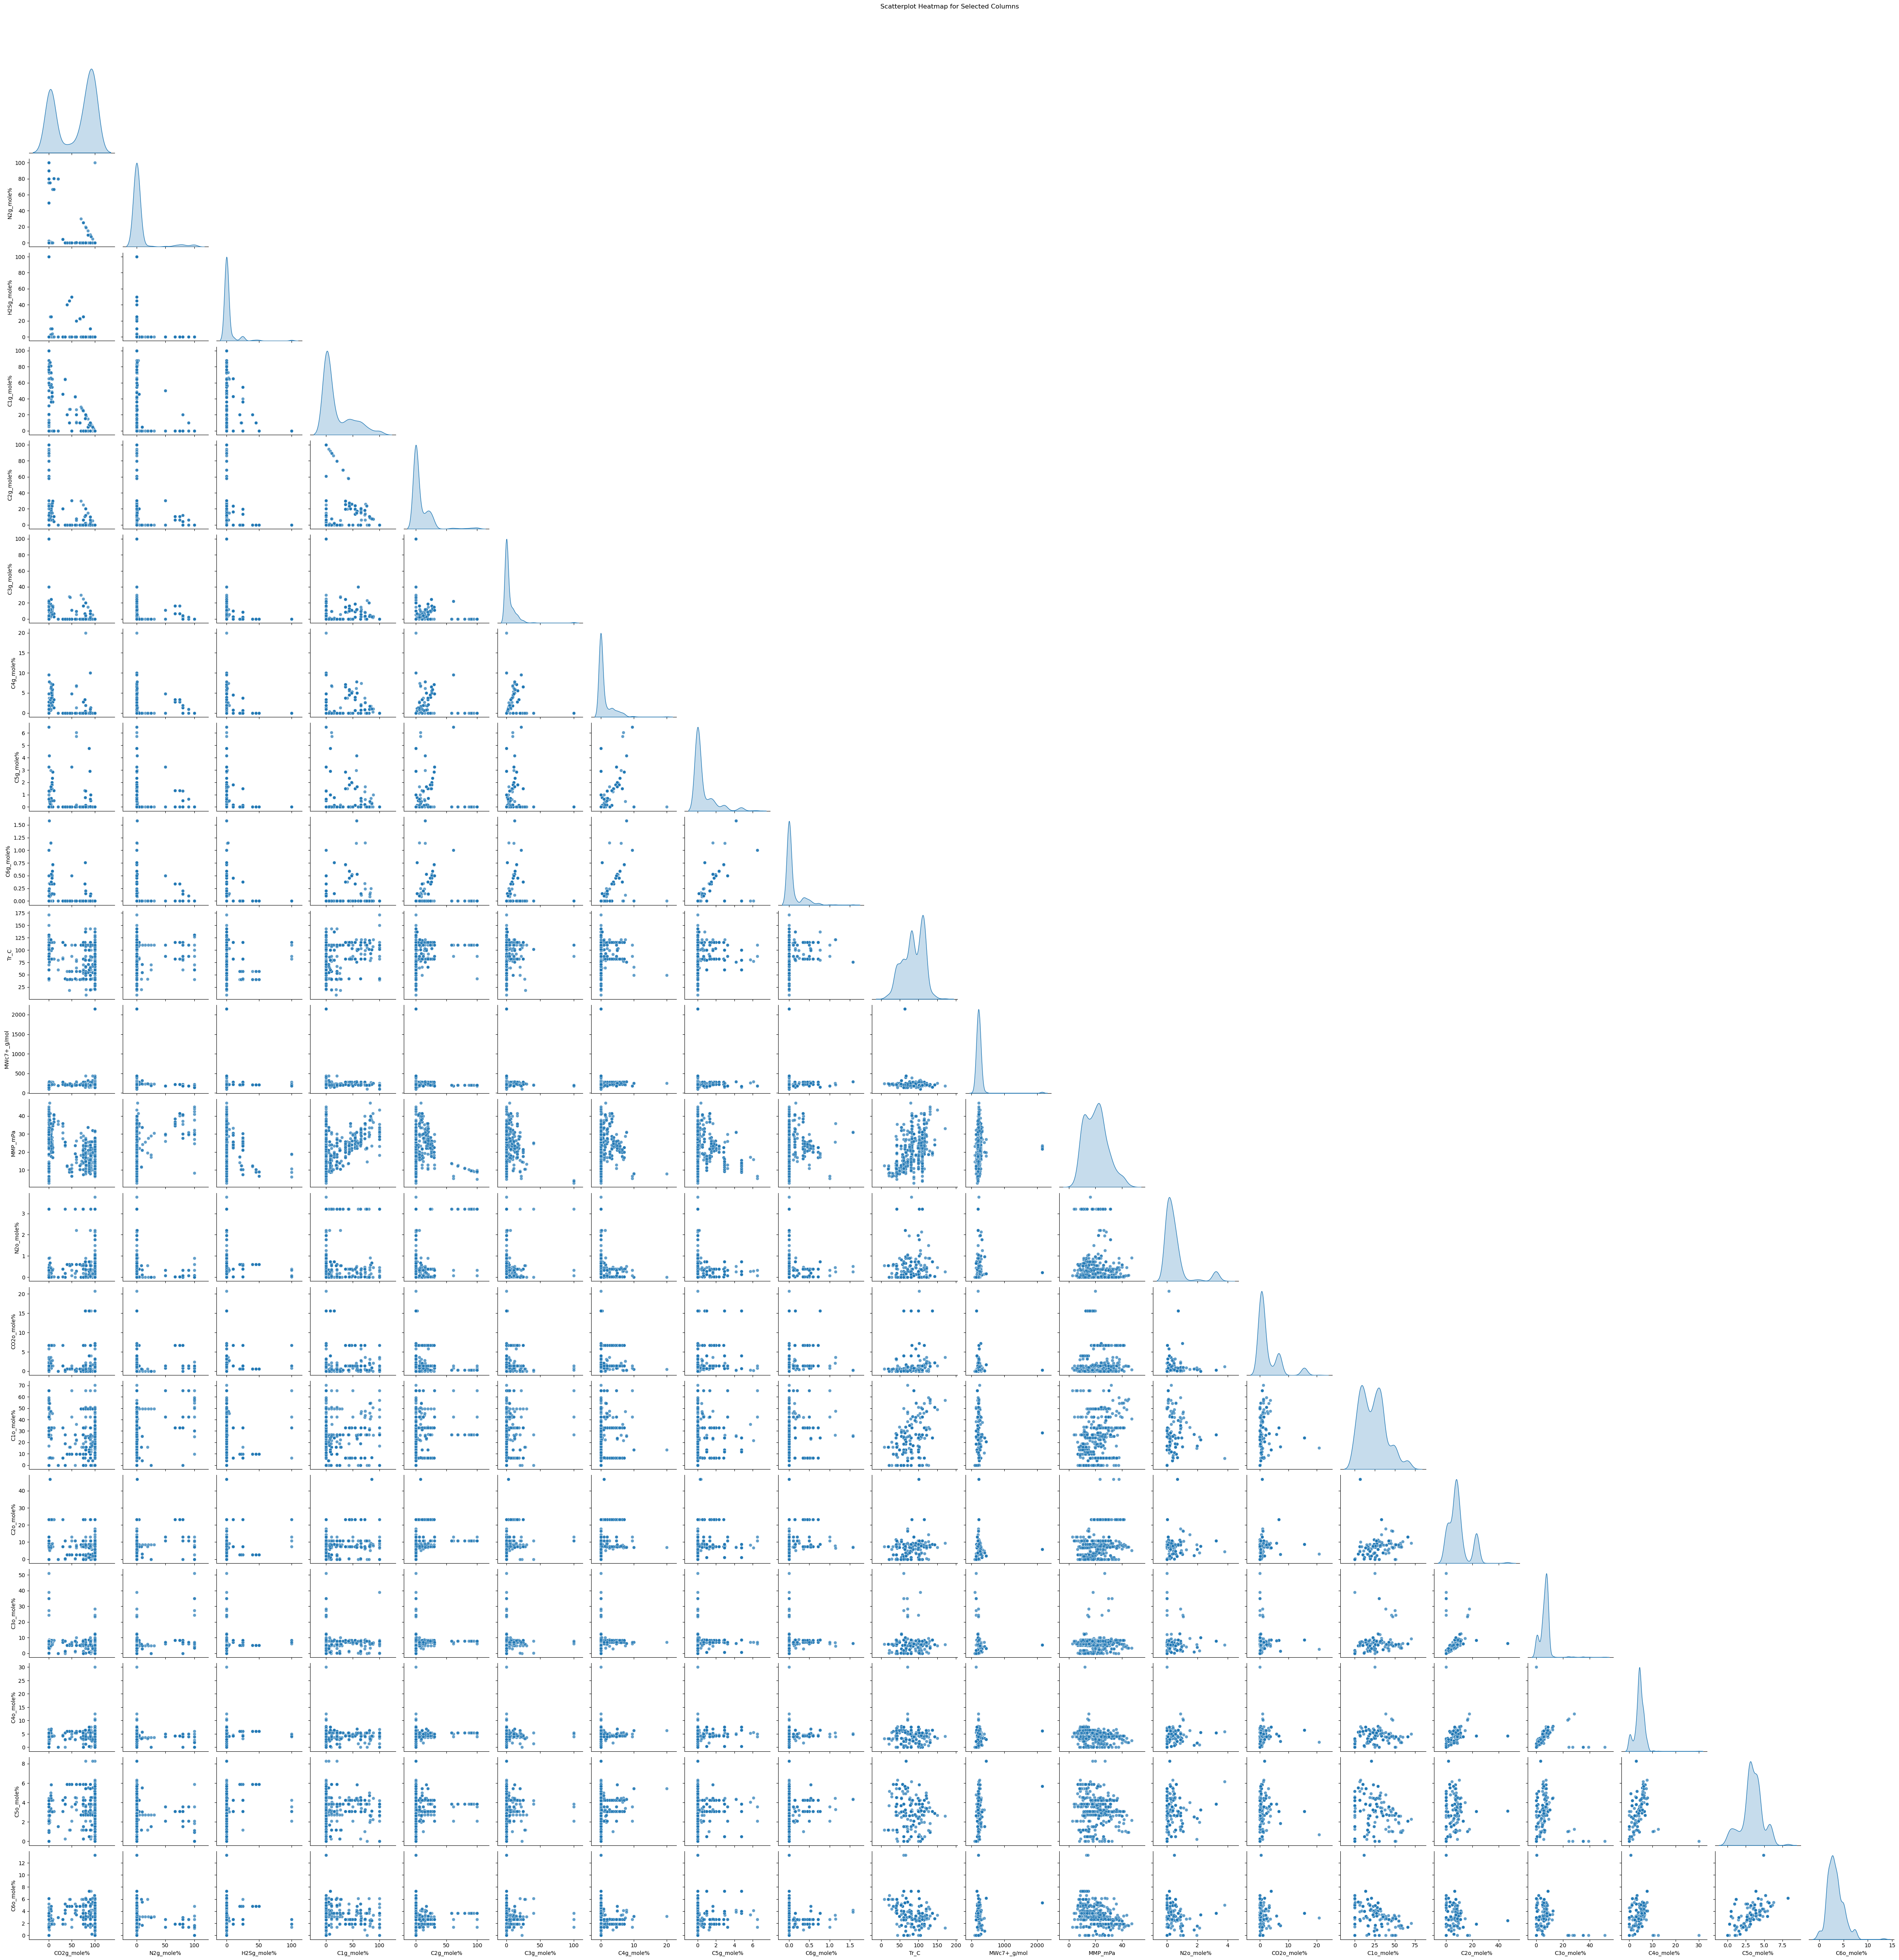

In [40]:
#scatterplot 
columns_to_plot = ['CO2g_mole%','N2g_mole%','H2Sg_mole%','C1g_mole%','C2g_mole%','C3g_mole%','C4g_mole%','C5g_mole%','C6g_mole%', 'Tr_C','MWc7+_g/mol',
'MMP_mPa','N2o_mole%','CO2o_mole%','C1o_mole%','C2o_mole%','C3o_mole%','C4o_mole%','C5o_mole%','C6o_mole%']
sns.pairplot(df_training[columns_to_plot], diag_kind='kde', corner=True, plot_kws={'alpha': 0.7})
plt.suptitle("Scatterplot Heatmap for Selected Columns", y=1.02)
plt.show()
 

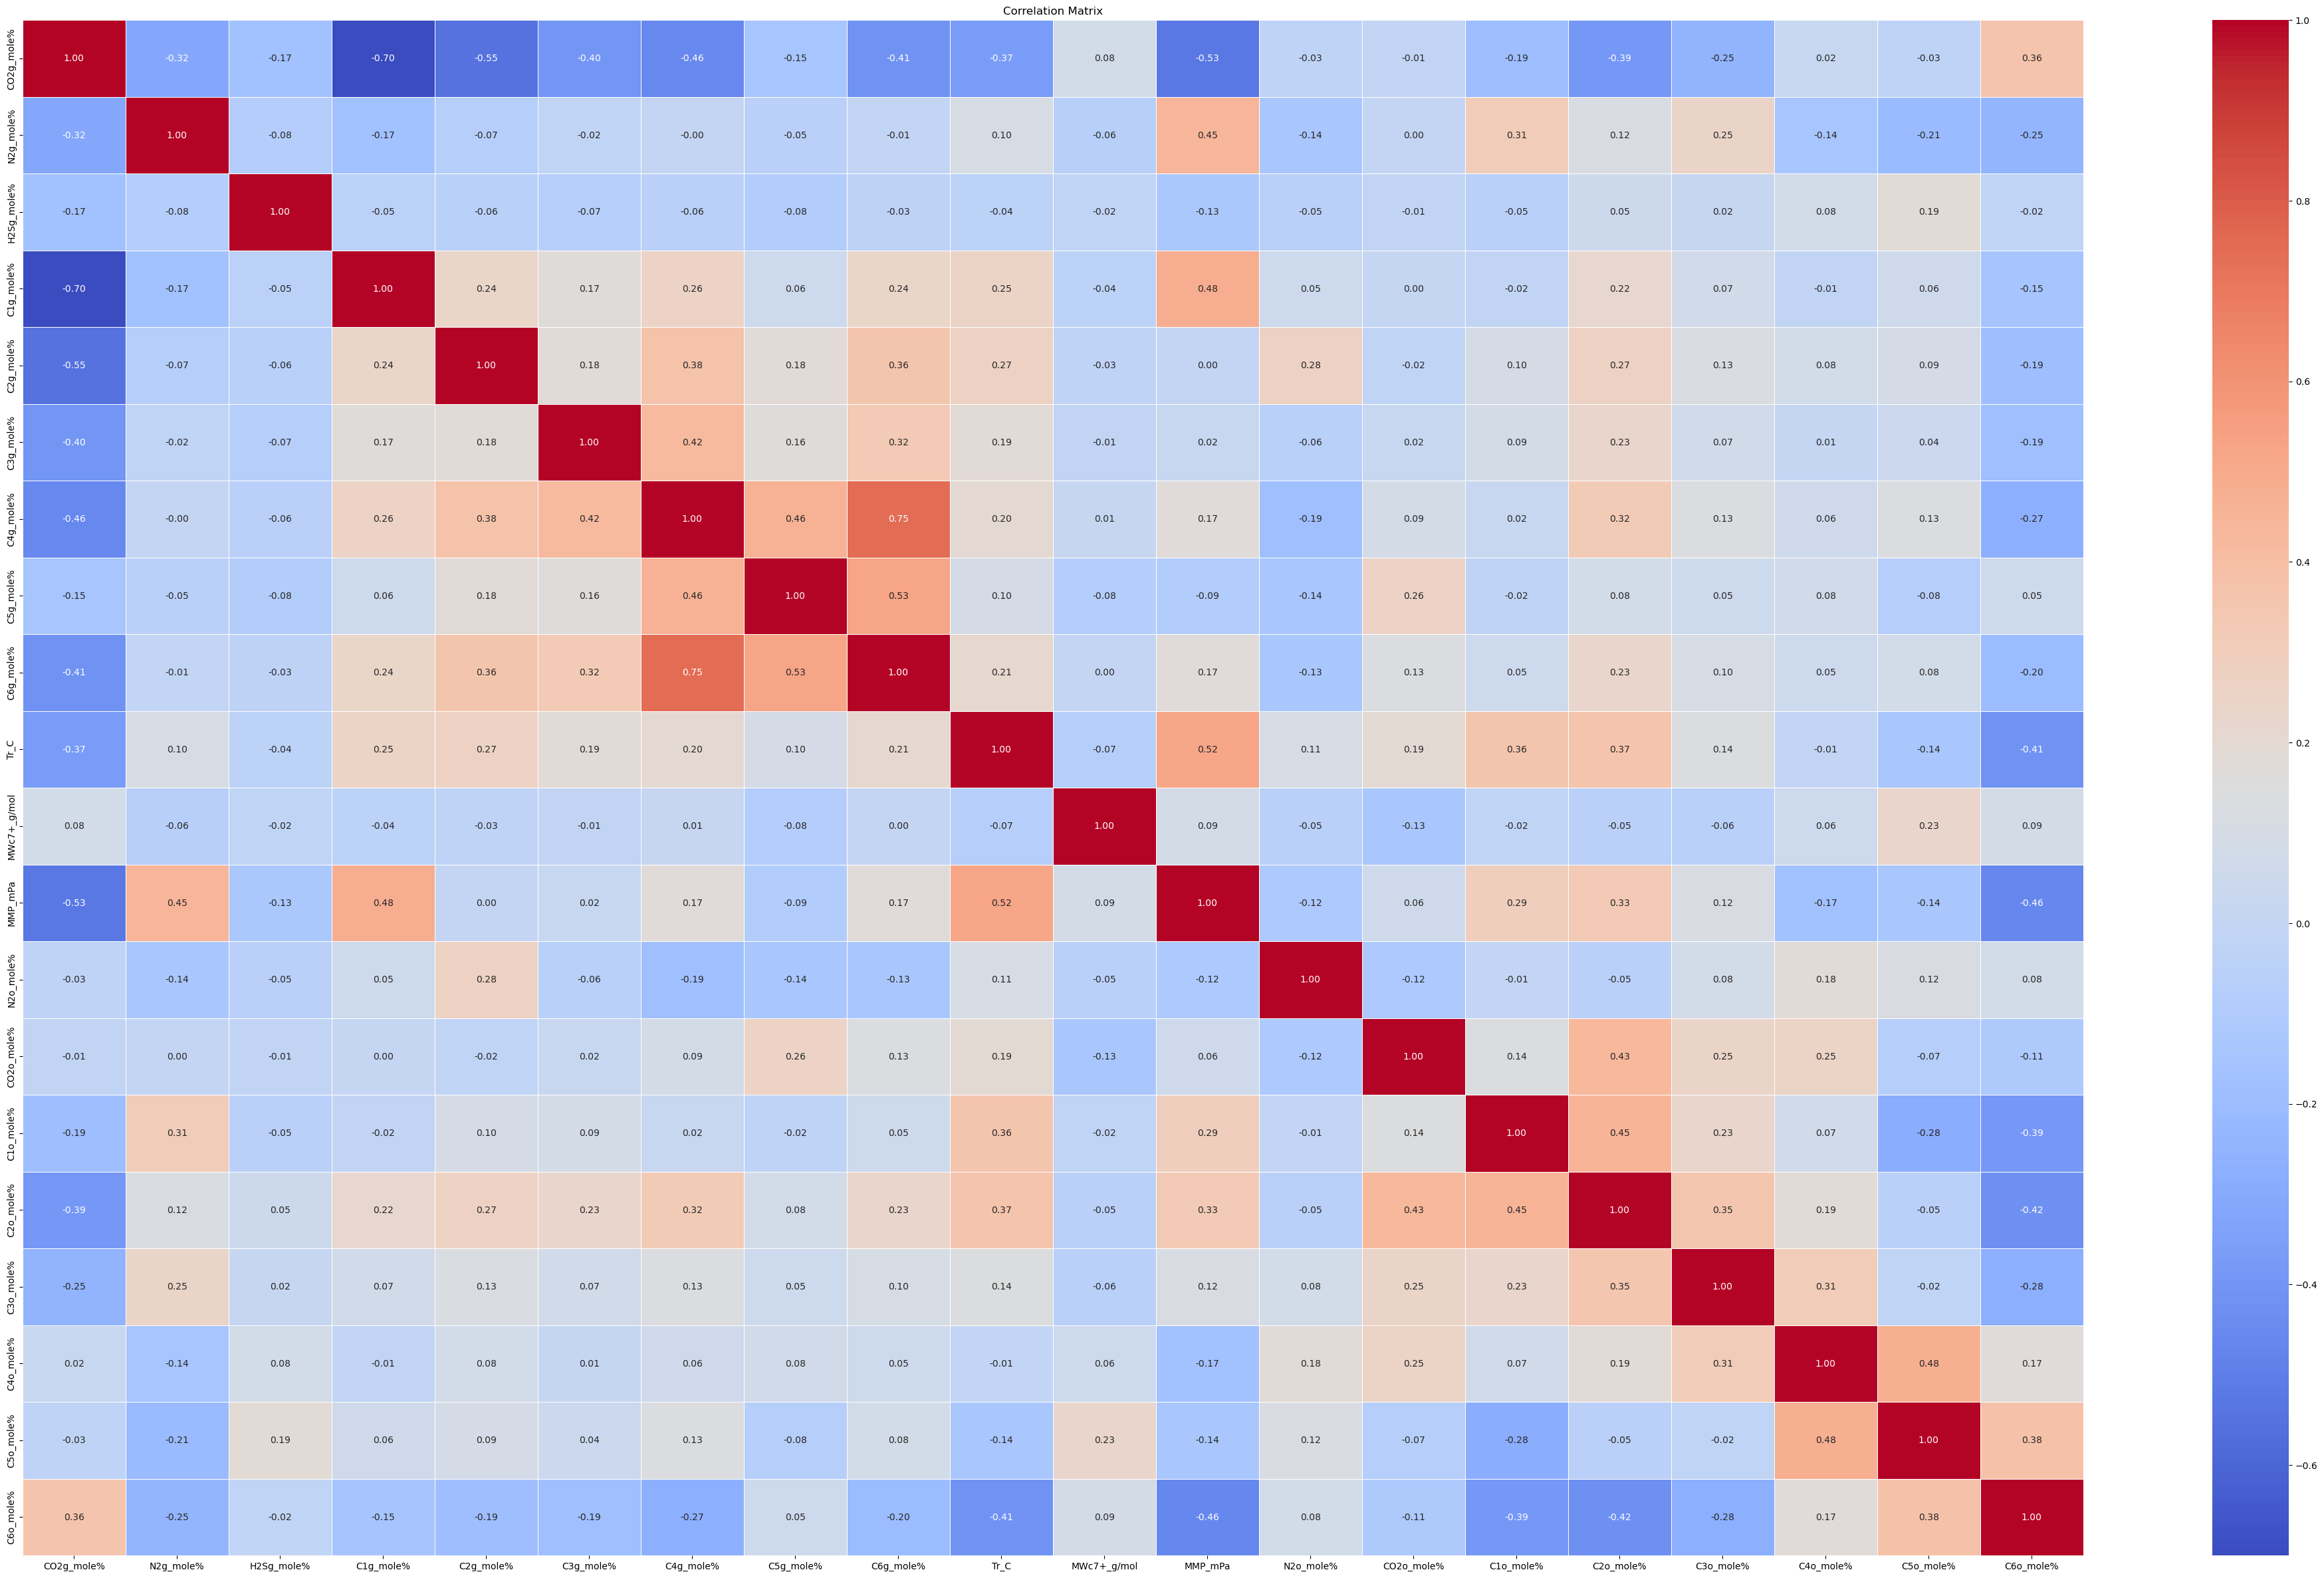

In [42]:
plt.figure(figsize=(50, 30))
corr_matrix = df_training.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [44]:
target_column = 'MMP_mPa'
feature_columns = [
    'CO2g_mole%', 'N2g_mole%', 'H2Sg_mole%', 'C1g_mole%', 'C2g_mole%', 
    'C3g_mole%', 'C4g_mole%', 'C5g_mole%', 'C6g_mole%',  
    'Tr_C', 'MWc7+_g/mol', 'N2o_mole%', 'CO2o_mole%', 'C1o_mole%', 
    'C2o_mole%', 'C3o_mole%', 'C4o_mole%', 'C5o_mole%', 'C6o_mole%', 
    
]

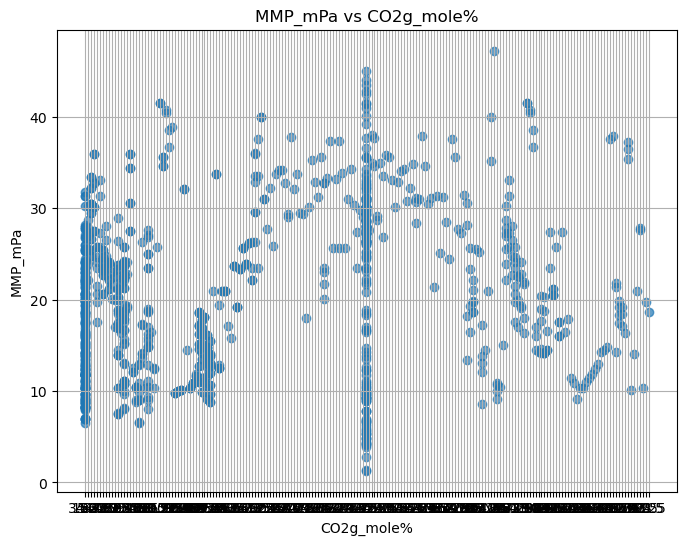

TypeError: 'value' must be an instance of str or bytes, not a float

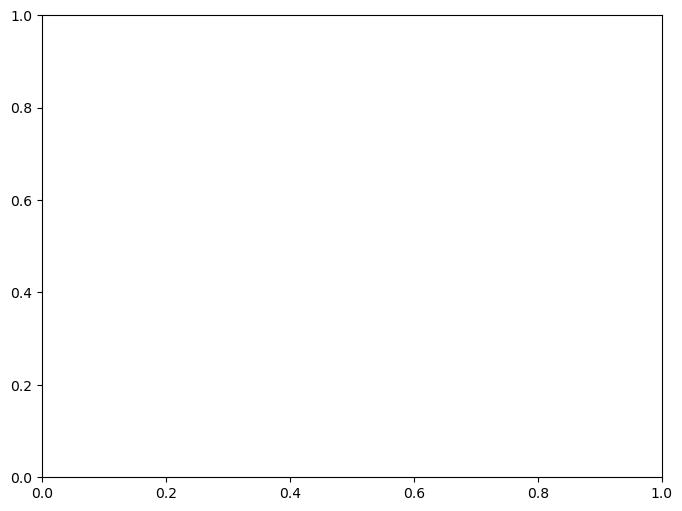

In [46]:
if target_column not in df.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

for feature in feature_columns:
    if feature in df.columns:
        plt.figure(figsize=(8, 6))
        plt.scatter(df[feature], df[target_column], alpha=0.7)
        plt.title(f'{target_column} vs {feature}')
        plt.xlabel(feature)
        plt.ylabel(target_column)
        plt.grid(True)
        plt.show()
    else:
        print(f"Feature column '{feature}' not found in the dataset.")

In [48]:
X = df_training[feature_columns]
y = df_training[target_column]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_predictions = rf_model.predict(X_test)

print("\nRandom Forest Evaluation:")

print("MSE:", mean_squared_error(y_test, rf_predictions))
print("R^2:", r2_score(y_test, rf_predictions))
print("MAE:", mean_absolute_error(y_test, rf_predictions))

mape = np.mean(np.abs((y_test - rf_predictions) / y_test)) * 100
print("MAPE:", mape)



Random Forest Evaluation:
MSE: 7.190895037412583
R^2: 0.9084939259629459
MAE: 1.5281846850947982
MAPE: 7.033074252620695


In [56]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# MLP Regressor Model
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

mlp_predictions = mlp_model.predict(X_test)

print("\nMLP Regressor Evaluation:")

print("MSE:", mean_squared_error(y_test, mlp_predictions))

print("R^2:", r2_score(y_test, mlp_predictions))

print("MAE:", mean_absolute_error(y_test, mlp_predictions))

mape = np.mean(np.abs((y_test - mlp_predictions) / y_test)) * 100
print("MAPE:", mape)



MLP Regressor Evaluation:
MSE: 8.087766625141397
R^2: 0.8970809937088307
MAE: 1.8241032501169518
MAPE: 9.19871983028267


In [58]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)
print("\nXGBoost Evaluation:")
print("MSE:", mean_squared_error(y_test, xgb_predictions))
print("R^2:", r2_score(y_test, xgb_predictions))
print("MAE:", mean_absolute_error(y_test, xgb_predictions))
mape = np.mean(np.abs((y_test - xgb_predictions) / y_test)) * 100
print("MAPE:", mape)



XGBoost Evaluation:
MSE: 4.909141788173971
R^2: 0.9375298499574984
MAE: 1.1437586078675281
MAPE: 5.129569008939835


In [60]:

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [66]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1]
}


In [68]:
#Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 1],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='r2', verbose=2)

In [70]:
# best model
best_model = grid_search.best_estimator_

In [72]:
# Save the model
joblib.dump(best_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [74]:
y_pred = best_model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [100]:
print("=== Training Dataset Evaluation ===")
print(f"R^2 Score: {r2_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")

=== Training Dataset Evaluation ===
R^2 Score: 0.9993
RMSE: 0.2254


In [78]:
df_blind = pd.read_csv('blind_final.csv')
X_blind = df_blind[feature_columns]
y_blind = df_blind[target_column]

In [80]:
X_blind_scaled = scaler.transform(X_blind)

In [82]:
y_blind_pred = best_model.predict(X_blind_scaled)

In [84]:
r2_blind = r2_score(y_blind, y_blind_pred)
rmse_blind = np.sqrt(mean_squared_error(y_blind, y_blind_pred))

In [86]:
print("\n=== Blind Dataset Evaluation ===")
print(f"R^2 Score: {r2_blind:.4f}")
print(f"RMSE: {rmse_blind:.4f}")


=== Blind Dataset Evaluation ===
R^2 Score: 0.9570
RMSE: 1.7373


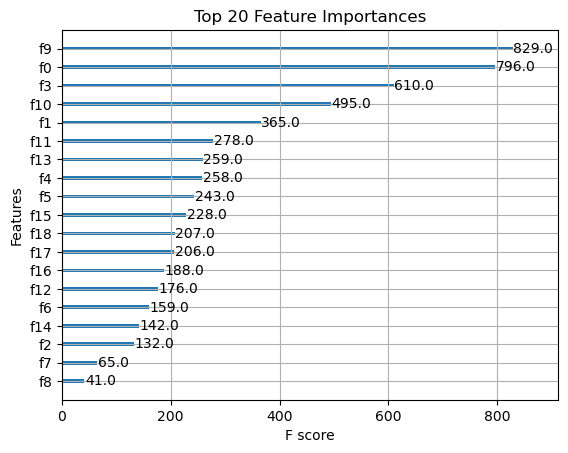

In [88]:
# Plot feature importance
xgb.plot_importance(best_model, importance_type='weight', max_num_features=20)
plt.title("Top 20 Feature Importances")
plt.show()

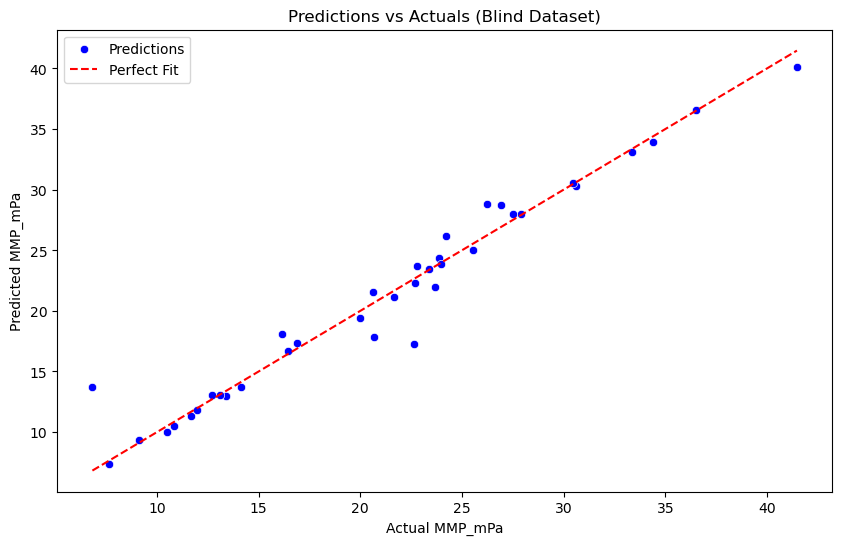

In [90]:
# Plot predictions vs actual for blind dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_blind, y=y_blind_pred, color='blue', label='Predictions')
plt.plot([y_blind.min(), y_blind.max()], [y_blind.min(), y_blind.max()], color='red', linestyle='--', label='Perfect Fit')
plt.xlabel("Actual MMP_mPa")
plt.ylabel("Predicted MMP_mPa")
plt.title("Predictions vs Actuals (Blind Dataset)")
plt.legend()
plt.show()

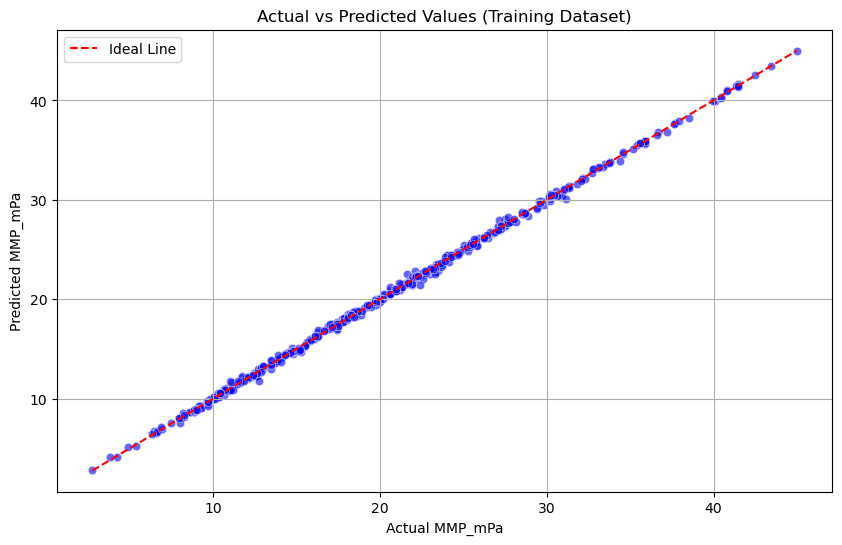

In [92]:
 #Plot Actual vs Predicted on the Training Dataset
y_train_pred = best_model.predict(X_train_scaled)

# Create a DataFrame to compare actual and predicted values
df_comparison = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})

# Plot the Actual vs Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=df_comparison, color='blue', alpha=0.6)
plt.plot([df_comparison['Actual'].min(), df_comparison['Actual'].max()],
         [df_comparison['Actual'].min(), df_comparison['Actual'].max()],
         color='red', linestyle='--', label="Ideal Line")
plt.title('Actual vs Predicted Values (Training Dataset)')
plt.xlabel('Actual MMP_mPa')
plt.ylabel('Predicted MMP_mPa')
plt.legend()
plt.grid(True)
plt.show()


In [94]:
# Evaluate the model on the training dataset
y_train_pred = best_model.predict(X_train_scaled)
r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

print("=== Training Dataset Evaluation ===")
print(f"R^2 Score: {r2_train:.4f}")
print(f"RMSE: {rmse_train:.4f}")
print(f"MAE: {mae_train:.4f}")
print(f"MAPE: {mape_train:.2f}")

# Evaluate the model on the blind dataset (as already implemented)
r2_blind = r2_score(y_blind, y_blind_pred)
rmse_blind = np.sqrt(mean_squared_error(y_blind, y_blind_pred))
mae_blind = mean_absolute_error(y_blind, y_blind_pred)
mape_blind = np.mean(np.abs((y_blind - y_blind_pred) / y_blind)) * 100

print("\n=== Blind Dataset Evaluation ===")
print(f"R^2 Score: {r2_blind:.4f}")
print(f"RMSE: {rmse_blind:.4f}")
print(f"MAE: {mae_blind:.4f}")
print(f"MAPE: {mape_blind:.2f}")

=== Training Dataset Evaluation ===
R^2 Score: 0.9993
RMSE: 0.2254
MAE: 0.1565
MAPE: 0.91

=== Blind Dataset Evaluation ===
R^2 Score: 0.9570
RMSE: 1.7373
MAE: 0.9852
MAPE: 6.58


In [102]:
#Field Application 1
new_data = np.array([[1.018, 0.184,	0,	85.051,	5.441,	4.355,	2.412,	0.993,	0.269,	129, 187, 0, 0,	0, 0, 0, 0,	0.0028, 0.1221

]])
prediction = best_model.predict(new_data)

print(f"Predicted MMP_mPa: {prediction[0]}")

Predicted MMP_mPa: 21.31247329711914


In [104]:
#Field Application 2
new_data = np.array([[100, 0,	0,	0,	0,	0,	0,	0,	0,	127, 233.85, 0, 0,	0, 0, 0.53, 1.18,	1.98, 6.45

]])
prediction = best_model.predict(new_data)

print(f"Predicted MMP_mPa: {prediction[0]}")

Predicted MMP_mPa: 19.84126853942871
